# Question 9

## Morphological Operations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

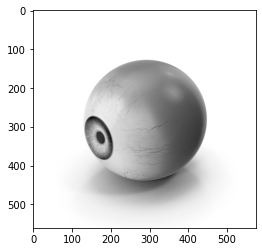

In [2]:
img = cv2.imread("images/eye.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

In [3]:
def padding(pic,k):
    #Padding
    #Number of row/columns needed for padding is floor(k/2)
    padNum = math.floor(k/2)
#     print(padNum)
    # 2k extra rows and columns are needed to accomodate both sides
    padPic = np.zeros((pic.shape[0]+(2*padNum),pic.shape[1]+(2*padNum)))
#     print(padPic.shape)
    padPic[padNum:padPic.shape[0]-padNum, padNum:padPic.shape[1]-padNum] = pic
    # Image will start from (padNum,padNum)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
#     print(pic.shape)
    padPic[xStart:xEnd, yStart:yEnd] = pic
#     plt.imshow(padPic,cmap='gray')
    return padPic

Morphological Gradient = Dilation - Erosion


In [4]:
def dilate(img,k):
    padPic = padding(img,k)
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    StructE = np.ones((k,k),dtype='uint8')
    #Min Filter
#     print(k)
#     print(padNum)
#     print(StructE)
#     print(padPic)
#     plt.imshow(padPic,cmap='gray')
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            vals = padPic[i-padNum:i+padNum+1,j-padNum:j+padNum+1]
            vals = vals*StructE
            out[i,j] = np.min(vals)
    out = out[xStart:xEnd,yStart:yEnd]
    return out

In [5]:
def erode(img,k):
    padPic = padding(img,k)
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    StructE = np.ones((k,k),dtype='uint8')
    #Max Filter
#     print(k)
#     print(padNum)
#     print(StructE)
#     print(padPic)
#     plt.imshow(padPic,cmap='gray')
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            vals = padPic[i-padNum:i+padNum+1,j-padNum:j+padNum+1]
            vals = vals*StructE
            out[i,j] = np.max(vals)
    out = out[xStart:xEnd,yStart:yEnd]
    return out

In [6]:
k = [3,5,7]
dilEye1 = dilate(img,k[0])
eroEye1 = erode(img,k[0])
dilEye2 = dilate(img,k[1])
eroEye2 = erode(img,k[1])
dilEye3 = dilate(img,k[2])
eroEye3 = erode(img,k[2])

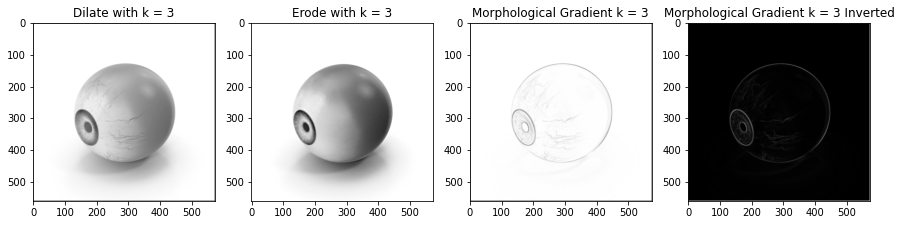

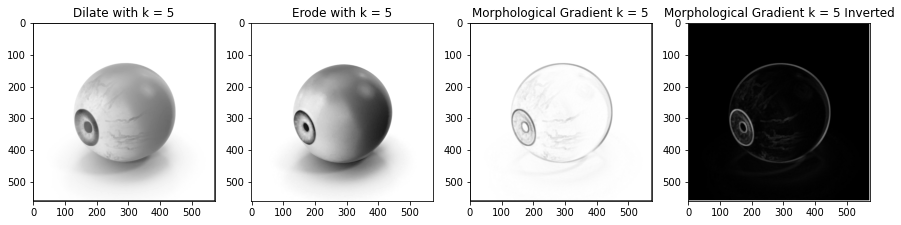

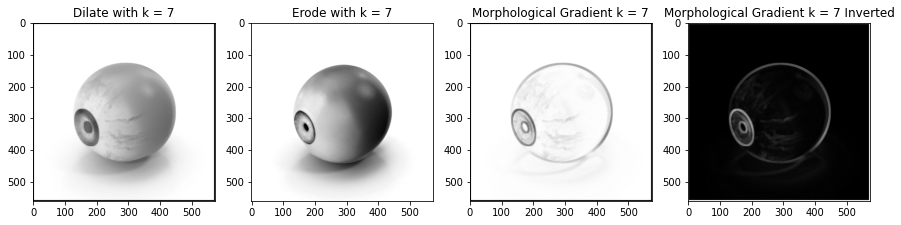

In [7]:
fig, axs = plt.subplots(1, 4,figsize=(15,15))
axs[0].imshow(dilEye1,cmap='gray')
axs[0].title.set_text('Dilate with k = {}'.format(k[0]))
axs[1].imshow(eroEye1,cmap='gray')
axs[1].title.set_text('Erode with k = {}'.format(k[0]))
axs[2].imshow((dilEye1-eroEye1),cmap='gray')
axs[2].title.set_text('Morphological Gradient k = {}'.format(k[0]))
axs[3].imshow(255-(dilEye1-eroEye1),cmap='gray')
axs[3].title.set_text('Morphological Gradient k = {} Inverted'.format(k[0]))

fig, axs = plt.subplots(1, 4,figsize=(15,15))
axs[0].imshow(dilEye2,cmap='gray')
axs[0].title.set_text('Dilate with k = {}'.format(k[1]))
axs[1].imshow(eroEye2,cmap='gray')
axs[1].title.set_text('Erode with k = {}'.format(k[1]))
axs[2].imshow((dilEye2-eroEye2),cmap='gray')
axs[2].title.set_text('Morphological Gradient k = {}'.format(k[1]))
axs[3].imshow(255-(dilEye2-eroEye2),cmap='gray')
axs[3].title.set_text('Morphological Gradient k = {} Inverted'.format(k[1]))

fig, axs = plt.subplots(1, 4,figsize=(15,15))
axs[0].imshow(dilEye3,cmap='gray')
axs[0].title.set_text('Dilate with k = {}'.format(k[2]))
axs[1].imshow(eroEye3,cmap='gray')
axs[1].title.set_text('Erode with k = {}'.format(k[2]))
axs[2].imshow((dilEye3-eroEye3),cmap='gray')
axs[2].title.set_text('Morphological Gradient k = {}'.format(k[2]))
axs[3].imshow(255-(dilEye3-eroEye3),cmap='gray')
axs[3].title.set_text('Morphological Gradient k = {} Inverted'.format(k[2]))